<a href="https://colab.research.google.com/github/makeshmr/Exploratory-Data-Analysis-Case-Study-Rise-in-Accidents-Cases-in-USA/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# image-classification

Use the "Run" button to execute the code.

In [1]:
!pip  install Pywavelets --upgrade --quiet

In [2]:
!pip install  plotly matplotlib seaborn --quiet

In [3]:
!pip install opencv-python --quiet

In [4]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!pip install opendatasets --upgrade --quiet

In [7]:
import cv2

cv2 module read an image 

we are going to read image of lionel messi


In [8]:
!pip install numpy --upgrade --quiet

In [11]:
import os
data_dir = '/content/drive/MyDrive/Dataset_classifcation'

In [12]:
os.listdir(data_dir)

['virat_kohli',
 'lionel_messi',
 'serena_williams',
 'roger_federer',
 'maria_sharapova',
 'cropped']

In [13]:
img = cv2.imread('/content/drive/MyDrive/test images/28003-1510231943.jpg')

downloadin the image

In [14]:
img.shape

(2881, 2218, 3)

x and y coordinates and RGB channels
third dimension indicates that


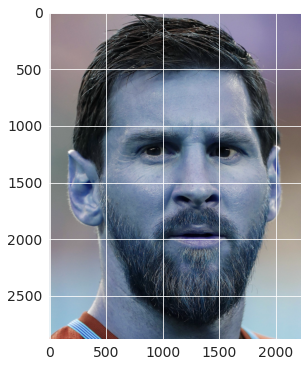

In [15]:
plt.imshow(img)

In [16]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(2881, 2218)

In [17]:
gray

array([[130, 132, 133, ..., 125, 121, 125],
       [132, 133, 133, ..., 123, 123, 126],
       [129, 130, 130, ..., 122, 123, 126],
       ...,
       [117, 115, 113, ..., 211, 210, 210],
       [117, 116, 115, ..., 211, 209, 209],
       [120, 120, 121, ..., 210, 210, 210]], dtype=uint8)

n-dimesnional array with numbers
plotting the image with matplotlib in gray

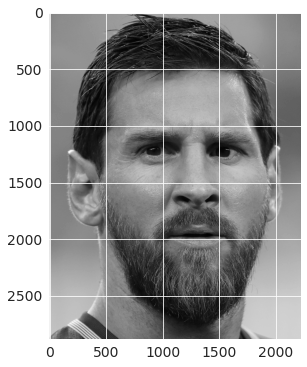

In [18]:
plt.imshow(gray,cmap ='gray')

Face detectioin using Haar Cascades 
discussion
basics

edge
line
for-rectangle 

features uses a moving window of these edgedd features to detect the eyes and rows

Area of eye is tend to darker
Tip of the nose wil be darker

readymade api to detect the face in the image
Harr cascade technique



One of the key things we can do with vision is object detect.

Object Detection using Haar feature-based cascade classifiers is an effective object detection method proposed by Paul Viola and Michael Jones in their paper and improved later by Rainer Lienhart.

It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images.

OpenCV provides a training method ( see Cascade Classifier Training) or pretrained models, that can be read using the cv2.CascadeClassifierload method. The pre-trained models are located in the data folder in the OpenCV installation or can be found here.

In this notebook we will play with some of the provided pre-trained haarcascades models. More on this topic can be found here.

Loading the classifier xml files

In [19]:
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/opencv opencv 3.4 data-haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/opencv opencv 3.4 data-haarcascades/haarcascade_eye.xml')

In [20]:
faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[ 384,  562, 1684, 1684]], dtype=int32)

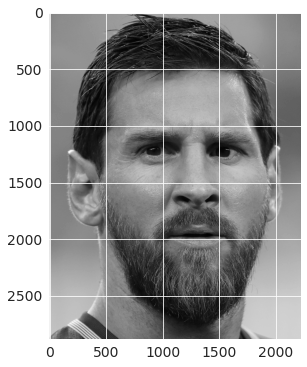

In [21]:
plt.imshow(gray,cmap ='gray')

gray image of messi, x,y, width, height 4 values in the 

- 384-face starts w.r.t width
- 562-face starts w.r.t height

In [22]:
(x,y,w,h) = faces[0]
x,y,w,h

(384, 562, 1684, 1684)

in  the image draw rectangle with a red color starts with x and y.

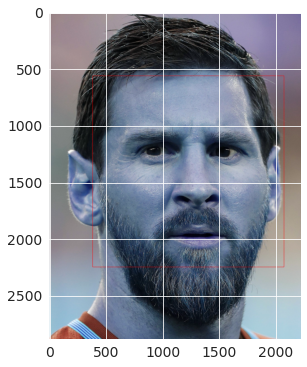

In [23]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

draw  the two eyes of the image

<function matplotlib.pyplot.show(*args, **kw)>

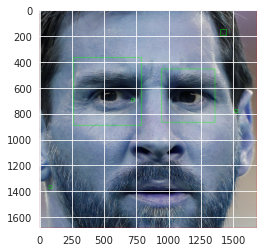

In [27]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
  face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  roi_gray = gray[y:y+h,x:x+w]
  roi_color = face_img[y:y+h,x:x+w]
  eyes =  eye_cascade.detectMultiScale(roi_gray)
  for (ex,ey,ew,eh)  in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(roi_color,cmap = 'gray')
plt.show

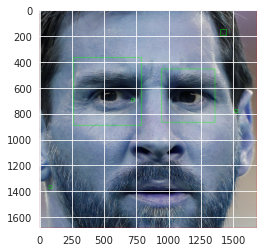

In [28]:
%matplotlib inline
plt.imshow(roi_color,cmap ='gray')